# **Decision Tree**

**1. What is a Decision Tree, and how does it work ?**

-> A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by splitting data into subsets based on feature values, forming a tree-like structure where each node represents a decision based on a feature, and each leaf represents an outcome or prediction.

**2. What are impurity measures in Decision Trees ?**

-> In Decision Trees, impurity measures are used to determine how mixed or pure a node is. A pure node contains data points that all belong to the same class, while an impure node contains a mix of classes.

Impurity measures guide the splitting decisions in the tree: the goal is to minimize impurity and create nodes that are as pure as possible.

**3. What is the mathematical formula for Gini Impurity	?**


-> The Gini Impurity formula is a way to measure the impurity or randomness of a set of data, especially in decision trees. For a binary classification problem, the formula is: G = 1 - (p² + (1-p)²), where 'p' is the probability of one class in a node.

**4. What is the mathematical formula for Entropy	?**

-> The mathematical formula for Entropy in a decision tree is:

$$
Entropy(t) = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$

where p_i is the proportion of data points belonging to class i at node t, and C is the total number of classes. Entropy measures the disorder or impurity in a dataset. It is zero when the node is pure (all samples belong to one class), and higher when classes are evenly mixed. In practice, use Entropy when you want a more information-theoretic approach to measuring node purity. However, for speed and simplicity, Gini Impurity is often preferred since it avoids logarithmic calculations and performs similarly in most cases.


**5. What is Information Gain, and how is it used in Decision Trees	?**

-> Information Gain measures how much uncertainty in a dataset is reduced after splitting it using a specific feature. It is calculated as the difference between the entropy before and after the split. In decision trees (like ID3), the feature with the highest Information Gain is chosen to split the data, helping build a tree that best separates the classes at each step.

**6. What is the difference between Gini Impurity and Entropy ?**

-> Gini Impurity and Entropy are both measures of node impurity used in decision trees to decide the best feature to split on. Gini measures the chance of incorrect classification, while Entropy measures the level of disorder or uncertainty in the node. Though both generally lead to similar results, Gini is faster to compute and is often used in practice (like in the CART algorithm), while Entropy provides a more theoretical approach rooted in information theory. The choice between them usually comes down to preference or computational considerations.

**7. What is the mathematical explanation behind Decision Trees ?**

-> The mathematical foundation of decision trees lies in recursively partitioning the data using feature-based splits that maximize homogeneity within subsets. For classification, this is achieved using impurity measures like Gini or Entropy, and for regression, variance reduction is used. At each node, the feature and threshold that yield the greatest information gain or least impurity are selected, continuing this process until stopping conditions are met. The final model makes predictions based on the structure of this learned tree.

**8. What is Pre-Pruning in Decision Trees ?**

-> Pre-pruning is a method used to stop the growth of a decision tree early by applying constraints like maximum depth or minimum number of samples. This helps reduce overfitting, improves generalization, and keeps the model simpler and faster to interpret.

**9. What is Post-Pruning in Decision Trees	?**

-> Post-pruning grows the decision tree completely and then trims back branches that do not help with generalization. This reduces overfitting by simplifying the tree after it has learned the training data, often leading to a more accurate and interpretable model.

**10. What is the difference between Pre-Pruning and Post-Pruning ?**

-> Pre-pruning stops tree growth early based on thresholds to avoid overfitting but risks missing useful splits.

Post-pruning allows a full tree to grow and then prunes back unnecessary parts to improve generalization, often yielding better accuracy but at the cost of extra computation and the need for validation data.

**11. What is a Decision Tree Regressor	?**

-> A Decision Tree Regressor predicts continuous outputs by recursively splitting the data to minimize variance within subsets, making predictions at leaves by averaging the target values. It's a flexible, interpretable model useful for regression problems.

**12.  What are the advantages and disadvantages of Decision Trees	?**

-> Decision trees are intuitive and flexible models that require minimal preprocessing and can handle a variety of data types. However, they tend to overfit and are sensitive to data variations, so careful tuning or using ensemble methods is often necessary for robust performance.

**13. How does a Decision Tree handle missing values	?**

-> Decision trees handle missing values by using surrogate splits (alternative features that mimic the primary split), assigning samples to the most common branch, or probabilistically distributing samples down branches. These approaches allow trees to remain flexible and robust even when data is incomplete.

**14.  How does a Decision Tree handle categorical features ?**

-> Decision trees handle categorical features by splitting nodes based on subsets of categories that best separate the target classes. Splits can be binary (grouping categories) or multi-way (each category gets its own branch), depending on the algorithm and implementation.

- High-cardinality categorical features (features with many categories) can make splitting computationally expensive.

- Some implementations encode categories numerically or use one-hot encoding before splitting, but this is not always necessary.

**15.  What are some real-world applications of Decision Trees ?**

-> Decision trees are widely used because they are easy to interpret and effective across many domains—from healthcare diagnostics and credit risk evaluation to marketing segmentation and predictive maintenance in manufacturing.

1. Healthcare

  - Diagnosing diseases based on symptoms and test results.

  - Predicting patient outcomes or treatment effectiveness.

2. Finance and Banking

  - Credit scoring: Approving or rejecting loan applications.

  - Fraud detection in transactions.

3. Marketing and Sales

  - Customer segmentation for targeted advertising.

  - Predicting customer churn.

# **Practical**

**1. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.**

In [1]:
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create dataset for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)

# Set parameters to make a simple tree (shallow)
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'max_depth': 3,
    'learning_rate': 1,  # High learning rate for single tree
    'verbose': -1
}

# Train a single tree (boosting rounds = 1)
bst = lgb.train(params, train_data, num_boost_round=1)

# Predict
y_pred = bst.predict(X_test)
# Get class with highest probability
y_pred_labels = y_pred.argmax(axis=1)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_labels):.2f}")


Accuracy: 1.00


**2. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.**

In [27]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier with Gini impurity criterion
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Print feature importances
print("Feature Importances:")
for feature_name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature_name}: {importance:.4f}")


Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0167
petal length (cm): 0.9061
petal width (cm): 0.0772


**3. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy.**

In [28]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier with Entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy using Entropy: {accuracy:.2f}")


Model Accuracy using Entropy: 1.00


**4. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).**

In [30]:
from sklearn.metrics import mean_squared_error

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.4952


**5. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.**

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Export the tree to DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the tree using graphviz
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")  # Saves as iris_decision_tree.pdf
graph.view()  # Opens the PDF viewer (optional)


'iris_decision_tree.pdf'

**6. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.**

In [33]:
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree with max depth = 3
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)

# Fully grown Decision Tree (no max_depth)
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Print accuracies
print(f"Accuracy with max_depth=3: {accuracy_pruned:.2f}")
print(f"Accuracy with fully grown tree: {accuracy_full:.2f}")


Accuracy with max_depth=3: 1.00
Accuracy with fully grown tree: 1.00


**7. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree.**

In [11]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree with min_samples_split=5
clf_custom = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_custom.fit(X_train, y_train)
y_pred_custom = clf_custom.predict(X_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)

# Decision Tree with default parameters
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

# Print the accuracies
print(f"Accuracy with min_samples_split=5: {accuracy_custom:.2f}")
print(f"Accuracy with default min_samples_split: {accuracy_default:.2f}")


Accuracy with min_samples_split=5: 1.00
Accuracy with default min_samples_split: 1.00


**8. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.**

In [13]:
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train without scaling
clf_unscaled = DecisionTreeClassifier(random_state=42)
clf_unscaled.fit(X_train, y_train)
y_pred_unscaled = clf_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# 2. Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train on scaled data
clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {accuracy_unscaled:.2f}")
print(f"Accuracy with scaling: {accuracy_scaled:.2f}")


Accuracy without scaling: 1.00
Accuracy with scaling: 1.00


**9. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.**

In [15]:
from sklearn.multiclass import OneVsRestClassifier

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier wrapped in OneVsRestClassifier
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))

# Train the model
ovr_clf.fit(X_train, y_train)

# Predict on test set
y_pred = ovr_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"One-vs-Rest Decision Tree Classifier Accuracy: {accuracy:.2f}")

One-vs-Rest Decision Tree Classifier Accuracy: 1.00


**10. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.**

In [16]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Display feature importance scores
print("Feature Importance Scores:")
for feature_name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature_name}: {importance:.4f}")

Feature Importance Scores:
sepal length (cm): 0.0000
sepal width (cm): 0.0167
petal length (cm): 0.9061
petal width (cm): 0.0772


**11. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.**

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor with max_depth=5
regressor_restricted = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor_restricted.fit(X_train, y_train)
y_pred_restricted = regressor_restricted.predict(X_test)
mse_restricted = mean_squared_error(y_test, y_pred_restricted)

# Fully grown Decision Tree Regressor (no max_depth)
regressor_full = DecisionTreeRegressor(random_state=42)
regressor_full.fit(X_train, y_train)
y_pred_full = regressor_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

# Print Mean Squared Errors
print(f"MSE with max_depth=5: {mse_restricted:.4f}")
print(f"MSE with fully grown tree: {mse_full:.4f}")

MSE with max_depth=5: 0.5245
MSE with fully grown tree: 0.4952


**12. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.**

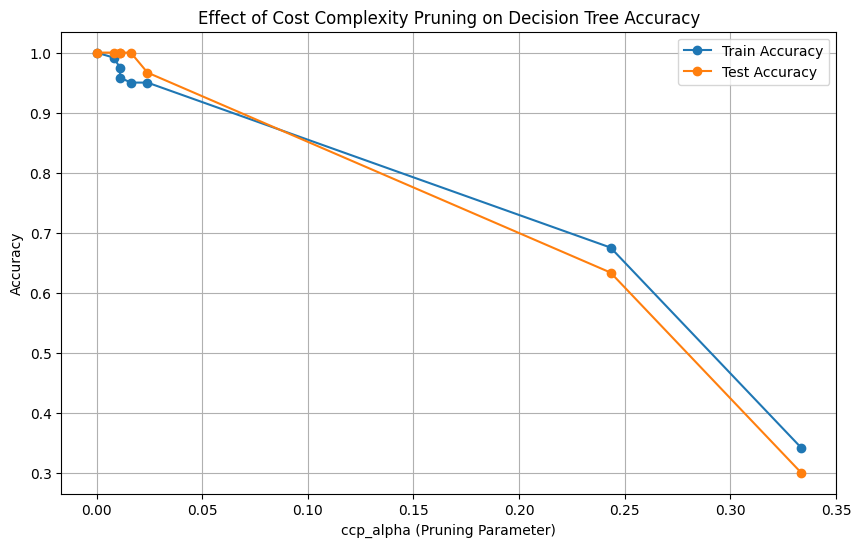

In [19]:
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train initial tree to get ccp_alphas for pruning path
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Lists to store results
clfs = []
train_scores = []
test_scores = []

# Train trees for different ccp_alpha values
for ccp_alpha in ccp_alphas:
    clf_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_temp.fit(X_train, y_train)
    clfs.append(clf_temp)
    train_scores.append(clf_temp.score(X_train, y_train))
    test_scores.append(clf_temp.score(X_test, y_test))

# Plot accuracy vs ccp_alpha
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('ccp_alpha (Pruning Parameter)')
plt.ylabel('Accuracy')
plt.title('Effect of Cost Complexity Pruning on Decision Tree Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**13. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score.**

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate Precision, Recall, and F1-Score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print the scores for each class
for i, class_name in enumerate(iris.target_names):
    print(f"Class: {class_name}")
    print(f" Precision: {precision[i]:.2f}")
    print(f" Recall:    {recall[i]:.2f}")
    print(f" F1-Score:  {f1[i]:.2f}\n")

# Alternatively, print a full classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Class: setosa
 Precision: 1.00
 Recall:    1.00
 F1-Score:  1.00

Class: versicolor
 Precision: 1.00
 Recall:    1.00
 F1-Score:  1.00

Class: virginica
 Precision: 1.00
 Recall:    1.00
 F1-Score:  1.00

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**14. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.**

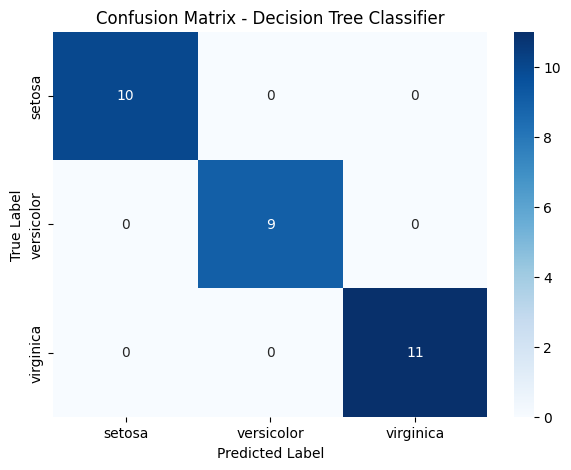

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


**15. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.**

In [26]:

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test set using best estimator
best_clf = grid_search.best_estimator_
test_accuracy = best_clf.score(X_test, y_test)
print(f"Test set accuracy with best parameters: {test_accuracy:.4f}")


Best parameters found: {'max_depth': 4, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9417
Test set accuracy with best parameters: 1.0000
